# <span style = 'color:orange'>  Anaconda Navigator Quick Guide

- Anaconda Navigator is a graphical user interface (GUI) for managing Conda environments, packages, and applications.
- It comes prebuilt with Python on its own and contains **500 packages**, meaning you have access to Tools for **Data Analysis** on the go (unless you decide to add new Environments - please refer to [Managing Environments](#environments) for more details.)

## Table of Contents
1. [Main Interface Overview](#interface)
2. [Managing Environments](#environments)
3. [Installing Packages](#packages)

<a name="interface"></a>
## <span style = 'color:red'> 1. Main Interface Overview

<img src= '../Pictures/Anaconda_navigator.png' style ='margin:10px auto; display:block; height:500px; width:1000px'>

| Component        | Description |
|------------------|-------------|
| Home         | Launch applications like Jupyter, Spyder, etc. |
| Environments | Manage Conda environments |
| Learning    | Tutorials and documentation |
| Community   | Anaconda community resources |

<a name="environments"></a>
## <span style = 'color:red'> 2. Managing Environments 

<img src=  '../Pictures/Anaconda_environments.png' style='width:1000px; display:block; height:500px; margin:10px auto'>

- When we download Anaconda, We would already have an **Environment** named `base`.
- Think of an **Environment** as a *basket* of packages that we put into it. Separate *baskets* cannot use each other packages and work independently of each other. This allows that, if we made a **fatal error** for an **Environment**, we would only need to create a new one, and download packages in there, preventing the loss of time from trying to repair the issue.


<div style='border:2px solid black; padding:10px'>

## **Guide**
1. Click "Environments" tab
2. **Create new environment**:
   - Click "Create"
   - Name your environment
   - Select Python version
   - Click "Create"
3. **Clone/Remove environments** using the buttons below the list
4. **Export/Import** environments using the import button (optional)
</div>
<a name="packages"></a>
## <span style = 'color:red'> 3. Installing Packages </span>
- While most of the packages are already available in the **base (root)** environment, we may need to download some other packages, here's a guide on how to do it:

<div style='border:2px solid black; padding:10px'>

## **Guide**
1. For **Windows** open `Anaconda Prompt`:

<img src = '../Pictures/Anaconda_prompt.png' style='width:400px; display:block; height:100px; margin:10px auto'>

1. For **macOS/Linux** open `Terminal`:
<img src = '../Pictures/Terminal.png' style='width:500px; display:block; height:100px; margin:10px auto'>

2. Use the Command `pip install <package>` (for example: `pip install numpy`)
3. **ONLY** The environment that is being shown on the left, in this case, for both pictures **base** environment, will receive the `<package>`.
</div>


# <span style = 'color:orange'> Jupyter Notebook/Lab Guide

- In short, there is not a lot of difference between **Jupyter Notebook and Jupyter Lab**, as a personal advice, the user can choose to use either of them, though note that **Jupyter Lab** offers a little more functionality than Notebook.

- This section helps to guide the user on the basics of **Jupyter Notebook/Lab**. Since the user is most likely to be opening this file with the aforementioned apps, for brevity, we will denote *Jupyter Notebook/Lab and the VSC Jupyter extension* as **Jupyter**.

- **Visual Studio Code** can also be used to follow this guide, as long as it uses the **Jupyter** extension.

- Jupyter allows for 3 types of cells, `Markdown, Code, and Raw`. We can change the functionality of a cell by choosing in the drop-down box on the top bar.
<img src = '../Pictures/Cell_types.png' style='width:1500px; display:block; height:300px; margin:10px auto'>>


## <span style = 'color:red'> Markdown/ Raw Cells.

- When you choose the cell type to be **Markdown**, (e.g, the cell you are reading right now). Text will not be understood as **Codes**, rather it is similar to **Microsoft Word**, We can **Format, add pictures and Videos**, as you have seen throughout the notebooks.
  
- An astute and curious user would see these formats often shown in my notebooks:
     - `<span style = 'color:red'>`: adds color
     - `<div style = 'border:2px solid black; padding:10px'>`: adds border
     - `<div class = 'alert alert-info'>`: adds Box color

- **Raw Cells** are **Markdown cells**, with **NO FORMATTING**, meaning that text will appear as is, and no formatting is applied. Due to this reason, raw cells are rarely used.

> The ability to add and format text like this, streamlines the end product you would need to submit, as it provides readability, as well as the ability to write codes in tandem with it.

## <span style = 'color:red'> Code Cells
- These are the standard cells that you can write codes in (e.g cells below this one), as it is a code cell, any special symbols such as "% $ #" as well as text will be understood as a **function**.
- We can however put **comments** in Code cells, which will work much like plain text itself.
- We will now display some lines of codes with **comments** for the user to see.
- As a bonus, the user will see that we can also use pip install to directly install packages while in jupyter, without going through anaconda prompt.

In [1]:
# Install the Yfinance library
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import math

# Read in the Apple data
stocks = yf.download(['AAPL', 'MSFT', 'NFLX'], start = datetime(2022, 1, 1), end = datetime.now())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


In [3]:
# Calculate the Returns 
returns = np.log(stocks['Close']/stocks['Close'].shift(1)) 
returns.dropna(inplace = True)

# Monte Carlo simulation of a portfolio of 3 stocks
port_returns= []
port_stds = []
cov_mat = returns.cov()
mean_ret = returns.mean()
for _ in range(1000):
    port_weights = np.random.rand(3)
    port_weights /= sum(port_weights)
    
    port_return = port_weights.dot(mean_ret.T)
    port_returns.append(port_return)
    
    port_std = np.sqrt(port_weights.dot(cov_mat).dot(port_weights.T))
    port_stds.append(port_std)

# Find the Maximum sharpe ratio portfolio
sharpe_ratios = []
for ret, std in zip(port_returns, port_stds):
    sharpe_ratio = ret/std
    sharpe_ratios.append(sharpe_ratio)
max_sharpe_ratio = max(sharpe_ratios)
max_sharpe_idx = sharpe_ratios.index(max_sharpe_ratio)

[Text(0.5, 1.0, 'Efficient Frontier'),
 Text(0.5, 0, 'Standard Deviatoin'),
 Text(0, 0.5, 'Returns')]

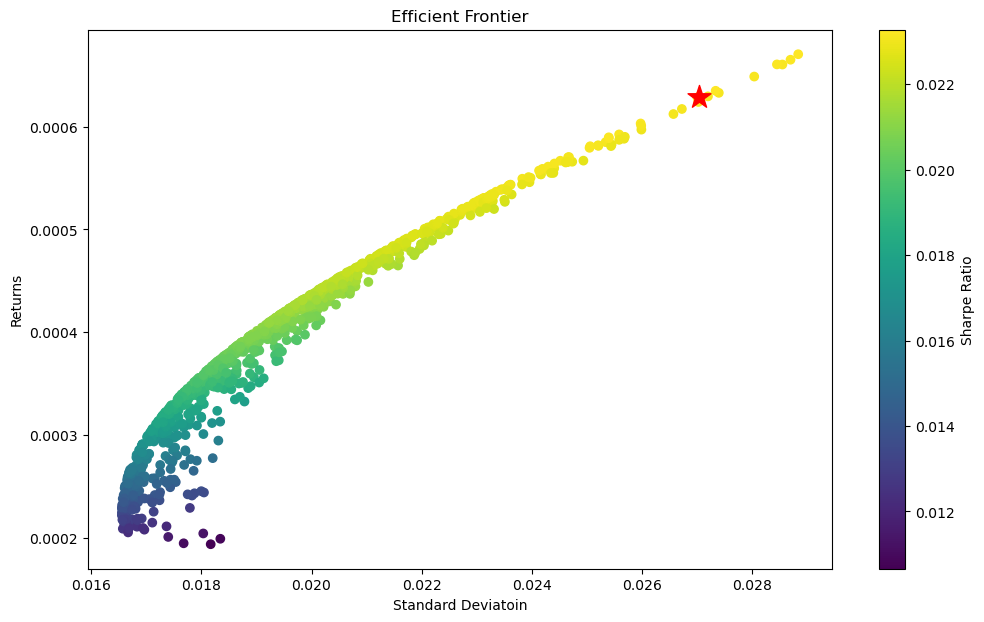

In [4]:
# Plot the Returns and the Standard Deviations of the portfolios
fig, ax = plt.subplots(1, 1, figsize = (12, 7))
scatter = ax.scatter(port_stds, port_returns, c = sharpe_ratios, cmap='viridis')
fig.colorbar(scatter, label = 'Sharpe Ratio')
ax.scatter(port_stds[max_sharpe_idx], port_returns[max_sharpe_idx],
       marker = '*', color = 'red', s = 300)
ax.set(title = "Efficient Frontier", xlabel = 'Standard Deviatoin', ylabel = 'Returns')

- The Code above showed a standard Way of Finding the **Efficient Frontier**, a Standard Finance Concept.
- The user will notice, that there are **comments (#)** that help understand what each block of code is doing.

<div class = 'alert alert-success'> 
    
- Congrats, the user now have access to the tools to assist them on their academic journey. By implementing these tools, one can interact with the lectures as well as having **interactivity** with the codes that can assist in understanding the lectures.
- Their Portfolio work will also be streamlined as now they can both **Code** as well as **Answering** question with the flexibility of the Markdown and Code cells in Jupyter Notebooks.

> Good Luck on your academic Journey.

</div>